In [1]:
# standard python imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:
#dataloading
data = np.load('exp_io_data\CoupledPendula_mean_in7_out7_Tmax2.0_data.npz')
for key, val in data.items():
    print(key)
    exec(key +'=val')
x=xlist
y=exp_out_list

xlist
exp_out_list


In [3]:
x_in=x[:,0:7]  #position input 0-6 dim
x_para=x[:,7:14]  #parameter input 7-13 dim
print(x_in)
print(x_para)

[[0.9065203  0.46772456 0.8676181  ... 0.59012175 0.62172747 0.62718135]
 [0.15156859 0.7638401  0.49441606 ... 0.08360076 0.14243811 0.32102752]
 [0.5069471  0.62958634 0.5609751  ... 0.5801834  0.31676775 0.8758434 ]
 ...
 [0.5225914  0.87181383 0.1571086  ... 0.72159827 0.71600056 0.6169285 ]
 [0.19196004 0.25575018 0.62890446 ... 0.40607    0.63531715 0.893706  ]
 [0.33413225 0.05580133 0.3941791  ... 0.23114264 0.9485196  0.456486  ]]
[[0.18589532 0.6744153  0.1666013  ... 0.95850337 0.17174435 0.4491179 ]
 [0.48794794 0.6924233  0.8322708  ... 0.8158572  0.03275138 0.4680807 ]
 [0.2703051  0.37102014 0.06968409 ... 0.81650996 0.44457942 0.6037927 ]
 ...
 [0.26646322 0.51527554 0.81414413 ... 0.08134663 0.52165586 0.8362263 ]
 [0.7729394  0.565187   0.95507675 ... 0.37746817 0.17572713 0.8890454 ]
 [0.01309651 0.30305517 0.92297536 ... 0.95677924 0.67755413 0.8177674 ]]


In [4]:
print(x.shape)
print(y.shape)

(2000, 14)
(2, 60, 2000, 7, 2)


In [5]:
#data pre-processing: get specific position data from 'FULL 'data
print(y.shape)

F=3 #Fth frame
y2=y[0:1,:,0:1000,:,0:1]
y2_np=torch.from_numpy(y2)
y2=torch.transpose(y2_np,1,2)
print(y2.shape)
y3=y2.squeeze(0).squeeze(3)
print(y3.shape)
y_train=y3[:,F:F+1,:]
print(y_train.shape)

(2, 60, 2000, 7, 2)
torch.Size([1, 1000, 60, 7, 1])
torch.Size([1000, 60, 7])
torch.Size([1000, 1, 7])


In [6]:
x_train=x_in[0:1000,:]
x_train2=x[0:1000,:]
print(x_train.shape)
print(x)

(1000, 7)
[[0.9065203  0.46772456 0.8676181  ... 0.95850337 0.17174435 0.4491179 ]
 [0.15156859 0.7638401  0.49441606 ... 0.8158572  0.03275138 0.4680807 ]
 [0.5069471  0.62958634 0.5609751  ... 0.81650996 0.44457942 0.6037927 ]
 ...
 [0.5225914  0.87181383 0.1571086  ... 0.08134663 0.52165586 0.8362263 ]
 [0.19196004 0.25575018 0.62890446 ... 0.37746817 0.17572713 0.8890454 ]
 [0.33413225 0.05580133 0.3941791  ... 0.95677924 0.67755413 0.8177674 ]]


In [7]:
#Don't use this one


# class Net(nn.Module):

#     def __init__(self):
#         super(Net, self).__init__()

#         self.layer1 = nn.Linear(14, 14 ,bias=True)
#         self.layer2 = nn.Linear(14, 14,bias=True)
#         self.layer3 = nn.Linear(14, 14,bias=True)
#         #self.layer4 = nn.Linear(14, 14,bias=True)
#         #self.layer5 = nn.Linear(14, 14,bias=True)
#         self.layer4 = nn.Linear(14, 7,bias=True)
#     def forward(self, x,activation="RELU"):
#         # Max pooling over a (2, 2) window
        
#         x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
#         x = x+torch.sigmoid(self.layer1(x))
#         x = x+torch.sigmoid(self.layer2(x))
#         x = x+torch.sigmoid(self.layer3(x))
#         #x = x+torch.sigmoid(self.layer4(x))
#         #x = x+torch.sigmoid(self.layer5(x))
#         x = self.layer4(x)
#         #x = F.relu(self.layer4(x))
#         #x = F.relu(self.layer5(x))
#         #x = torch.sigmoid(self.layer6(x))
#         return x


# net = Net()
# print(net)

In [8]:
#RNN model


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x,activation="RELU"):
        
        if activation=="RELU":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+0.1*(self.layer1(x))
            x = x+0.1*(self.layer2(x))
            x = x+0.1*(self.layer3(x))
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))
        if activation=="SIG":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+torch.sigmoid(self.layer1(x))
            x = x+torch.sigmoid(self.layer2(x))
            x = x+torch.sigmoid(self.layer3(x))
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))            
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [9]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([14, 14])


In [10]:
x_data=torch.tensor(x_train2)
input = x_data
out = net(input,"SIG")
print(out)
print(out.shape)

tensor([[ 0.7554,  2.3667,  0.2741,  ...,  0.4679, -0.7899, -1.3008],
        [ 0.6681,  2.2911,  0.0662,  ...,  0.7567, -0.7496, -1.0679],
        [ 0.8999,  2.1831,  0.4566,  ...,  0.1841, -0.8555, -1.1966],
        ...,
        [ 0.7911,  2.1466,  0.4072,  ...,  0.2502, -0.6592, -0.8657],
        [ 0.6116,  2.3984,  0.4150,  ..., -0.0473, -0.7107, -1.3521],
        [ 0.7732,  2.2267,  0.1321,  ...,  0.1368, -0.3113, -0.9802]],
       grad_fn=<AddmmBackward>)
torch.Size([1000, 7])


In [11]:
#assign backward memory
net.zero_grad()
out.backward(torch.randn(1000,7))

In [12]:
target=y_train
target_new=target.view(1000,7)
print(target_new.shape)
criterion=nn.MSELoss()
loss=criterion(out,target_new)
print(loss)

torch.Size([1000, 7])
tensor(1.7746, grad_fn=<MseLossBackward>)


In [13]:
#backprop
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.01, betas=(0.9, 0.999), eps=1e-09, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)


tensor(0.6257, grad_fn=<MseLossBackward>)
tensor(0.5749, grad_fn=<MseLossBackward>)
tensor(0.5365, grad_fn=<MseLossBackward>)
tensor(0.5088, grad_fn=<MseLossBackward>)
tensor(0.4898, grad_fn=<MseLossBackward>)
tensor(0.4770, grad_fn=<MseLossBackward>)
tensor(0.4684, grad_fn=<MseLossBackward>)
tensor(0.4623, grad_fn=<MseLossBackward>)
tensor(0.4575, grad_fn=<MseLossBackward>)
tensor(0.4532, grad_fn=<MseLossBackward>)
tensor(0.4491, grad_fn=<MseLossBackward>)
tensor(0.4450, grad_fn=<MseLossBackward>)
tensor(0.4410, grad_fn=<MseLossBackward>)
tensor(0.4369, grad_fn=<MseLossBackward>)
tensor(0.4329, grad_fn=<MseLossBackward>)
tensor(0.4290, grad_fn=<MseLossBackward>)
tensor(0.4251, grad_fn=<MseLossBackward>)
tensor(0.4214, grad_fn=<MseLossBackward>)
tensor(0.4177, grad_fn=<MseLossBackward>)
tensor(0.4140, grad_fn=<MseLossBackward>)
tensor(0.4103, grad_fn=<MseLossBackward>)
tensor(0.4065, grad_fn=<MseLossBackward>)
tensor(0.4027, grad_fn=<MseLossBackward>)
tensor(0.3988, grad_fn=<MseLossBac

tensor(0.3259, grad_fn=<MseLossBackward>)


In [14]:
x_test=x[1000:2000,:]
print(x_test.shape)
y1=y[0:1,:,1000:2000,:,0:1]
#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
y1_np=torch.from_numpy(y1)
y1=torch.transpose(y1_np,1,2)

(1000, 14)


In [15]:
#get exp data
y4=y1.squeeze(0).squeeze(3)
print(y4.shape)

y_test=y4[:,F:F+1,:]
print(y_test.shape)


torch.Size([1000, 60, 7])
torch.Size([1000, 1, 7])


In [16]:
x_test=torch.tensor(x_test)
test_out=net(x_test)
#LOSS = criterion(test_out, y_test)
#print(test_out)
#print(y_test)
y_test_new=torch.transpose(y_test,1,2).squeeze(2)# reshape test_exp data so that loss estimator works
test_loss=criterion(y_test_new,test_out)
#print(test_loss)

Text(0, 0.5, 'y_pred')

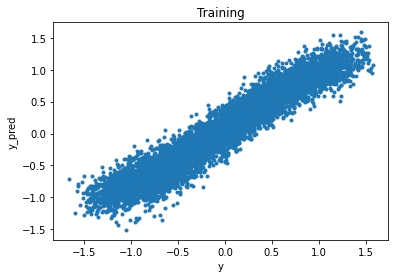

In [17]:
#rouph plot
plt.plot(y_test_new.flatten(), 5*test_out.detach().numpy().flatten(), '.')
plt.title('Training')
plt.xlabel('y')
plt.ylabel('y_pred')

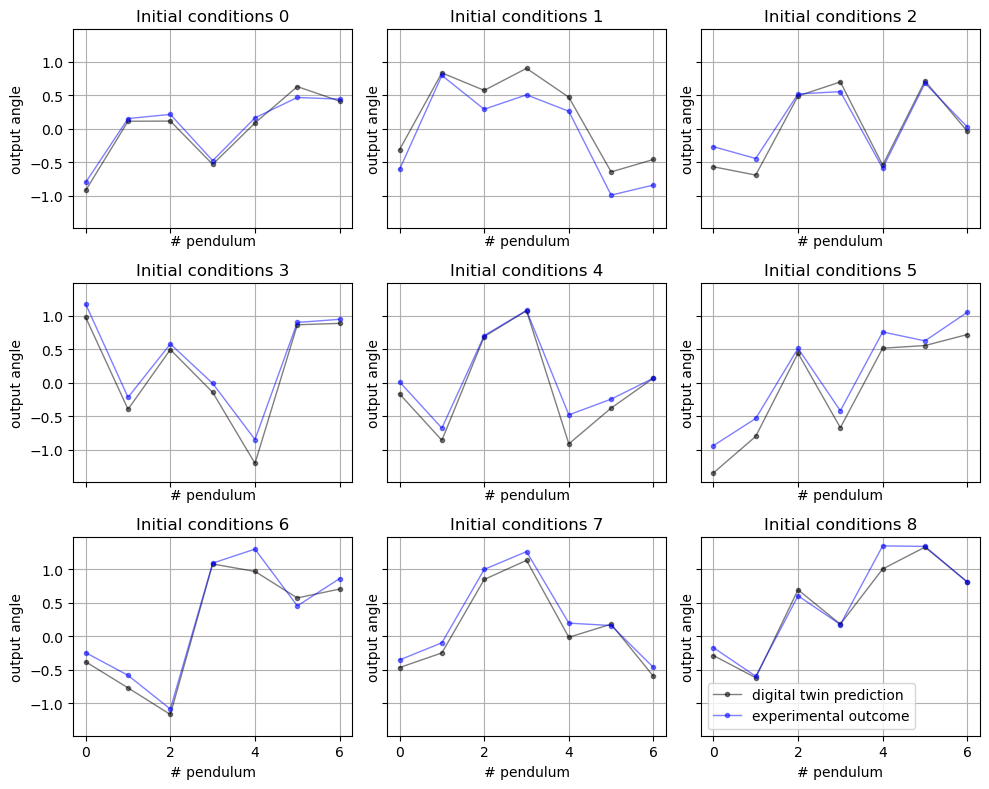

In [18]:
#plot cell
def plot_dt_exp_comparison(yexp, ypred):

    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = [10,8], dpi = 100, sharex=True, sharey=True)
    for i in range(9):
        plt.sca(axs.flatten()[i])
        plt.plot(ypred[i], '.-', lw = 1, c = 'k', alpha = 0.5, label = 'digital twin prediction')
        plt.plot(yexp[i], '.-', lw = 1, c = 'b', alpha = 0.5, label = 'experimental outcome')
        plt.xlabel('# pendulum')
        plt.ylabel('output angle')
        plt.title(f'Initial conditions {i}')
        plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig('img/coupled_pendula_dt_examples.png')
    plt.show()
    
plot_dt_exp_comparison(y_test_new,5*test_out.detach())

In [19]:
##any code below is useless
class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()

        self.layer1 = nn.Linear(14, 120)
        self.layer2 = nn.Linear(120, 120)
        self.layer3 = nn.Linear(120, 120)
        self.layer4 = nn.Linear(120, 84)
        self.layer5 = nn.Linear(84, 42)
        self.layer6 = nn.Linear(42, 7)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.layer1(x))
        x = x+F.relu(self.layer2(x))
        x = x+F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.tanh(self.layer5(x))
        x = F.relu(self.layer6(x))
        return x


net2 = Net2()
print(net2)

Net2(
  (layer1): Linear(in_features=14, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=120, bias=True)
  (layer3): Linear(in_features=120, out_features=120, bias=True)
  (layer4): Linear(in_features=120, out_features=84, bias=True)
  (layer5): Linear(in_features=84, out_features=42, bias=True)
  (layer6): Linear(in_features=42, out_features=7, bias=True)
)


params2 = list(net2.parameters())
print(len(params2))
print(params2[0].size())

In [20]:
x_data=torch.tensor(x)
input = x_data
out = net2(input)
print(out)
print(out.shape)

AttributeError: 'int' object has no attribute 'relu'

In [ ]:
target=y1[0:1000,:,:]
target_new=target.view(1000,7)

In [ ]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net2(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)
